<a href="https://colab.research.google.com/github/zakaria1159/football/blob/master/WC2018Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

https://github.com/statsbomb/open-data/archive/refs/heads/master.zip

In [2]:
!wget --no-check-certificate \
    "https://github.com/statsbomb/open-data/archive/refs/heads/master.zip" \
    -O "/tmp/world-cup-morocco.zip"


zip_ref = zipfile.ZipFile('/tmp/world-cup-morocco.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2022-04-16 22:03:12--  https://github.com/statsbomb/open-data/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/statsbomb/open-data/zip/refs/heads/master [following]
--2022-04-16 22:03:12--  https://codeload.github.com/statsbomb/open-data/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/world-cup-morocco.zip’

/tmp/world-cup-moro     [       <=>          ] 346.61M  5.70MB/s    in 72s     

2022-04-16 22:04:24 (4.81 MB/s) - ‘/tmp/world-cup-morocco.zip’ saved [363442445]



In [3]:
import pandas as pd

competition = pd.read_json('/tmp/open-data-master/data/competitions.json')

competition.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-09T14:06:05.802
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [4]:
competition[competition.competition_name == 'FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
18,43,3,International,FIFA World Cup,male,False,True,2018,2021-12-06T23:11:59.985953,2021-06-13T16:17:31.694,None,2021-12-06T23:11:59.985953


In [5]:
import json

with open('/tmp/open-data-master/data/matches/43/3.json') as f:
    data = json.load(f)

data

[{'away_score': 1,
  'away_team': {'away_team_gender': 'male',
   'away_team_group': 'Group A',
   'away_team_id': 783,
   'away_team_name': 'Uruguay',
   'country': {'id': 242, 'name': 'Uruguay'},
   'managers': [{'country': {'id': 242, 'name': 'Uruguay'},
     'dob': '1947-03-03',
     'id': 476,
     'name': 'Óscar Washington Tabárez Silva',
     'nickname': 'Óscar Tabárez'}]},
  'competition': {'competition_id': 43,
   'competition_name': 'FIFA World Cup',
   'country_name': 'International'},
  'competition_stage': {'id': 10, 'name': 'Group Stage'},
  'home_score': 0,
  'home_team': {'country': {'id': 66, 'name': 'Egypt'},
   'home_team_gender': 'male',
   'home_team_group': 'Group A',
   'home_team_id': 774,
   'home_team_name': 'Egypt',
   'managers': [{'country': {'id': 11, 'name': 'Argentina'},
     'dob': '1955-11-16',
     'id': 486,
     'name': 'Héctor Raúl Cúper',
     'nickname': 'Héctor Cúper'}]},
  'kick_off': '14:00:00.000',
  'last_updated': '2021-12-06T22:24:47.98021

In [6]:
with open('/tmp/open-data-master/data/matches/43/3.json') as f:
    data = json.load(f)
    for i in data:
        print('ID:', i['match_id'], i['home_team']['home_team_name'], i['home_score'], '-', i['away_score'], i['away_team']['away_team_name'])

ID: 7578 Egypt 0 - 1 Uruguay
ID: 7553 South Korea 1 - 2 Mexico
ID: 7544 Uruguay 1 - 0 Saudi Arabia
ID: 7536 Belgium 3 - 0 Panama
ID: 7555 Poland 0 - 3 Colombia
ID: 7546 France 1 - 0 Peru
ID: 7539 Poland 1 - 2 Senegal
ID: 7538 Sweden 1 - 0 South Korea
ID: 7576 Portugal 3 - 3 Spain
ID: 7565 Serbia 0 - 2 Brazil
ID: 7551 Germany 2 - 1 Sweden
ID: 7550 Serbia 1 - 2 Switzerland
ID: 7537 Tunisia 1 - 2 England
ID: 7580 France 4 - 3 Argentina
ID: 8650 Brazil 1 - 2 Belgium
ID: 7581 Croatia 1 - 1 Denmark
ID: 7549 Nigeria 2 - 0 Iceland
ID: 7529 Croatia 2 - 0 Nigeria
ID: 7548 Brazil 2 - 0 Costa Rica
ID: 7534 Germany 0 - 1 Mexico
ID: 7562 Australia 0 - 2 Peru
ID: 7571 Senegal 0 - 1 Colombia
ID: 7569 Panama 1 - 2 Tunisia
ID: 7568 Switzerland 2 - 2 Costa Rica
ID: 7530 France 2 - 1 Australia
ID: 7558 Uruguay 3 - 0 Russia
ID: 7583 Brazil 2 - 0 Mexico
ID: 7547 Denmark 1 - 1 Australia
ID: 7535 Costa Rica 0 - 1 Serbia
ID: 7584 Belgium 3 - 2 Japan
ID: 7545 Argentina 0 - 3 Croatia
ID: 8649 Uruguay 0 - 2 Franc



*   ID: 7542 Portugal 1 - 0 Morocco
*   ID: 7577 Morocco 0 - 1 Iran
*   ID: 7560 Spain 2 - 2 Morocco








In [7]:
with open('/tmp/open-data-master/data/events/7542.json') as f:
    morpor = json.load(f)
    
morpor

[{'duration': 2.252,
  'id': 'c3a01e2d-02fe-4d24-b291-8ed6a6d16d51',
  'index': 1,
  'minute': 0,
  'period': 1,
  'play_pattern': {'id': 1, 'name': 'Regular Play'},
  'possession': 1,
  'possession_team': {'id': 780, 'name': 'Portugal'},
  'second': 0,
  'tactics': {'formation': 442,
   'lineup': [{'jersey_number': 1,
     'player': {'id': 5205, 'name': 'Rui Pedro dos Santos Patrício'},
     'position': {'id': 1, 'name': 'Goalkeeper'}},
    {'jersey_number': 21,
     'player': {'id': 3329, 'name': 'Cédric Ricardo Alves Soares'},
     'position': {'id': 2, 'name': 'Right Back'}},
    {'jersey_number': 3,
     'player': {'id': 20016, 'name': 'Kléper Laveran Lima Ferreira'},
     'position': {'id': 3, 'name': 'Right Center Back'}},
    {'jersey_number': 6,
     'player': {'id': 3960, 'name': 'José Miguel da Rocha Fonte'},
     'position': {'id': 5, 'name': 'Left Center Back'}},
    {'jersey_number': 5,
     'player': {'id': 5209, 'name': 'Raphaël Adelino José Guerreiro'},
     'position'

In [21]:
df = pd.json_normalize(morpor, sep='_').assign(match_id="7542")
pd.set_option('max_columns', None)
df.head()


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,under_pressure,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,carry_end_location,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,counterpress,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_body_part_id,shot_body_part_name,shot_outcome_id,shot_outcome_name,shot_technique_id,shot_technique_name,shot_type_id,shot_type_name,shot_freeze_frame,goalkeeper_end_location,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_type_id,goalkeeper_type_name,ball_recovery_recovery_failure,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,shot_first_time,pass_goal_assist,goalkeeper_outcome_id,goalkeeper_outcome_name,dribble_outcome_id,dribble_outcome_name,foul_committed_type_id,foul_committed_type_name,pass_deflected,block_deflection,dribble_overrun,ball_recovery_offensive,pass_switch,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_technique_id,goalkeeper_technique_name,pass_aerial_won,shot_aerial_won,clearance_aerial_won,foul_won_defensive,50_50_outcome_id,50_50_outcome_name,dribble_nutmeg,foul_committed_card_id,foul_committed_card_name,pass_backheel,pass_cut_back,block_offensive,injury_stoppage_in_chain,foul_committed_advantage,foul_won_advantage,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,foul_committed_offensive,match_id
0,c3a01e2d-02fe-4d24-b291-8ed6a6d16d51,1,1,00:00:00.000,0,0,1,2.252,35,Starting XI,780,Portugal,1,Regular Play,780,Portugal,442.0,"[{'player': {'id': 5205, 'name': 'Rui Pedro do...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7542
1,f6b2184f-73f9-434d-8774-c3b5c77fdd26,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,780,Portugal,1,Regular Play,788,Morocco,4231.0,"[{'player': {'id': 5233, 'name': 'Munir Mohand...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7542
2,cf4ba856-d756-47ec-97b9-32f571b504d1,3,1,00:00:00.000,0,0,1,7.573,18,Half Start,780,Portugal,1,Regular Play,780,Portugal,NaN,NaN,[93e265e9-d68c-4ea6-806b-a2719eb9d188],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7542
3,93e265e9-d68c-4ea6-806b-a2719eb9d188,4,1,00:00:00.000,0,0,1,9.120,18,Half Start,780,Portugal,1,Regular Play,788,Morocco,NaN,NaN,[cf4ba856-d756-47ec-97b9-32f571b504d1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7542
4,

In [23]:
pd.set_option('max_columns', None)
df.columns


Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession',
       'duration', 'type_id', 'type_name',
       ...
       'block_offensive', 'injury_stoppage_in_chain',
       'foul_committed_advantage', 'foul_won_advantage',
       'substitution_outcome_id', 'substitution_outcome_name',
       'substitution_replacement_id', 'substitution_replacement_name',
       'foul_committed_offensive', 'match_id'],
      dtype='object', length=107)

In [24]:
shots = df[df.type_name == 'Shot'].set_index('id')
shots.head
#shots.columns
#shots['shot_statsbomb_xg']

<bound method NDFrame.head of                                       index  period     timestamp  minute  \
id                                                                          
0ff34e1a-720d-4d79-a5e8-50a4390109e7     83       1  00:01:02.860       1   
1a66b177-fea7-43d1-8eef-ebbdd7053657    161       1  00:03:32.620       3   
4a37cb6a-9cad-4a04-aed9-c6071f1172f3    168       1  00:03:55.300       3   
6213a4a1-110b-4e7c-8609-5b3318cd7421    300       1  00:08:26.900       8   
4106a3de-b540-443b-94b8-b410bb76879f    359       1  00:10:57.580      10   
db59a1e2-d813-46cb-9ca5-a643712b7ba1    454       1  00:13:32.460      13   
edcdc20d-a79d-4182-9ec4-cfc905ae6d59    679       1  00:17:14.300      17   
1b72591a-f85a-4f3b-ae4d-922c839191d5    883       1  00:22:07.500      22   
9d557d56-6d87-42e5-a85a-6ff104d8834f   1157       1  00:29:53.740      29   
a15d5c2c-55b2-4a2c-a59f-0aaeba922722   1170       1  00:31:30.700      31   
2721355c-20d5-4a43-bb56-03149480d6de   1244   

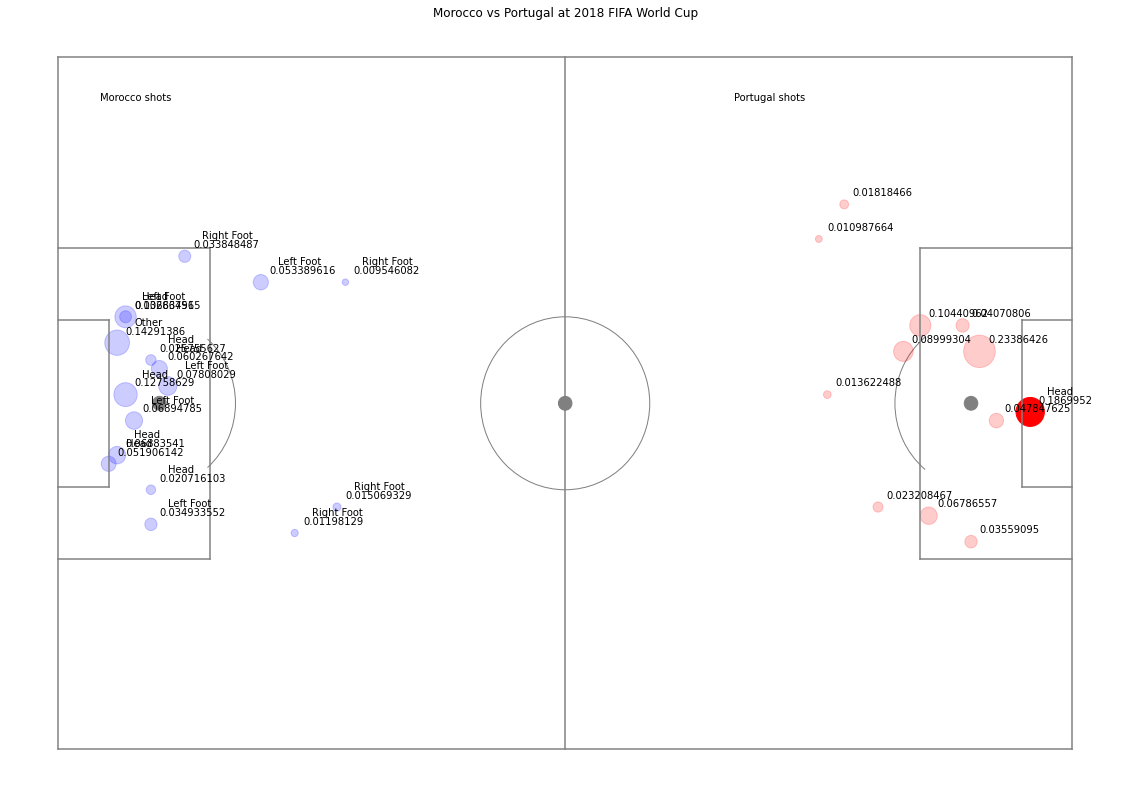

In [35]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from matplotlib.patches import Arc

def createPitch(length,width, unity,linecolor): # in meters
    # Code by @JPJ_dejong

    """
    creates a plot in which the 'length' is the length of the pitch (goal to goal).
    And 'width' is the width of the pitch (sideline to sideline). 
    Fill in the unity in meters or in yards.
    """
    #Set unity
    if unity == "meters":
        # Set boundaries
        if length >= 120.5 or width >= 75.5:
            return(str("Field dimensions are too big for meters as unity, didn't you mean yards as unity?\
                       Otherwise the maximum length is 120 meters and the maximum width is 75 meters. Please try again"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
            plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
            plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)
            
            #Left 5-meters Box
            plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
            plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)
            
            #Right 5 -eters Box
            plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
            plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
            plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)
            
            #Prepare Circles
            centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
            rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
            #Axis titles

    #check unity again
    elif unity == "yards":
        #check boundaries again
        if length <= 95:
            return(str("Didn't you mean meters as unity?"))
        elif length >= 131 or width >= 101:
            return(str("Field dimensions are too big. Maximum length is 130, maximum width is 100"))
        #Run program if unity and boundaries are accepted
        else:
            #Create figure
            fig=plt.figure()
            #fig.set_size_inches(7, 5)
            ax=fig.add_subplot(1,1,1)
           
            #Pitch Outline & Centre Line
            plt.plot([0,0],[0,width], color=linecolor)
            plt.plot([0,length],[width,width], color=linecolor)
            plt.plot([length,length],[width,0], color=linecolor)
            plt.plot([length,0],[0,0], color=linecolor)
            plt.plot([length/2,length/2],[0,width], color=linecolor)
            
            #Left Penalty Area
            plt.plot([18 ,18],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([0,18],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([18,0],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Right Penalty Area
            plt.plot([(length-18),length],[(width/2 +18),(width/2 +18)],color=linecolor)
            plt.plot([(length-18), (length-18)],[(width/2 +18),(width/2-18)],color=linecolor)
            plt.plot([(length-18),length],[(width/2 -18),(width/2 -18)],color=linecolor)
            
            #Left 6-yard Box
            plt.plot([0,6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([6,6],[(width/2+7.32/2+6),(width/2-7.32/2-6)],color=linecolor)
            plt.plot([6,0],[(width/2-7.32/2-6),(width/2-7.32/2-6)],color=linecolor)
            
            #Right 6-yard Box
            plt.plot([length,length-6],[(width/2+7.32/2+6),(width/2+7.32/2+6)],color=linecolor)
            plt.plot([length-6,length-6],[(width/2+7.32/2+6),width/2-7.32/2-6],color=linecolor)
            plt.plot([length-6,length],[(width/2-7.32/2-6),width/2-7.32/2-6],color=linecolor)
            
            #Prepare Circles; 10 yards distance. penalty on 12 yards
            centreCircle = plt.Circle((length/2,width/2),10,color=linecolor,fill=False)
            centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
            leftPenSpot = plt.Circle((12,width/2),0.8,color=linecolor)
            rightPenSpot = plt.Circle((length-12,width/2),0.8,color=linecolor)
            
            #Draw Circles
            ax.add_patch(centreCircle)
            ax.add_patch(centreSpot)
            ax.add_patch(leftPenSpot)
            ax.add_patch(rightPenSpot)
            
            #Prepare Arcs
            leftArc = Arc((11,width/2),height=20,width=20,angle=0,theta1=312,theta2=48,color=linecolor)
            rightArc = Arc((length-11,width/2),height=20,width=20,angle=0,theta1=130,theta2=230,color=linecolor)
            
            #Draw Arcs
            ax.add_patch(leftArc)
            ax.add_patch(rightArc)
                
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax


def createPitchOld():
    #Taken from FC Python        
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,90], color=linecolor)
    plt.plot([0,130],[90,90], color=linecolor)
    plt.plot([130,130],[90,0], color=linecolor)
    plt.plot([130,0],[0,0], color=linecolor)
    plt.plot([65,65],[0,90], color=linecolor)
    
    #Left Penalty Area
    plt.plot([16.5,16.5],[65,25],color=linecolor)
    plt.plot([0,16.5],[65,65],color=linecolor)
    plt.plot([16.5,0],[25,25],color=linecolor)
    
    #Right Penalty Area
    plt.plot([130,113.5],[65,65],color=linecolor)
    plt.plot([113.5,113.5],[65,25],color=linecolor)
    plt.plot([113.5,130],[25,25],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([0,5.5],[54,54],color=linecolor)
    plt.plot([5.5,5.5],[54,36],color=linecolor)
    plt.plot([5.5,0.5],[36,36],color=linecolor)
    
    #Right 6-yard Box
    plt.plot([130,124.5],[54,54],color=linecolor)
    plt.plot([124.5,124.5],[54,36],color=linecolor)
    plt.plot([124.5,130],[36,36],color=linecolor)
    
    #Prepare Circles
    centreCircle = plt.Circle((65,45),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((65,45),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,45),0.8,color=linecolor)
    rightPenSpot = plt.Circle((119,45),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((11,45),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color=linecolor)
    rightArc = Arc((119,45),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

def createGoalMouth():
    #Adopted from FC Python
    #Create figure
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)

    linecolor='black'

    #Pitch Outline & Centre Line
    plt.plot([0,65],[0,0], color=linecolor)
    plt.plot([65,65],[50,0], color=linecolor)
    plt.plot([0,0],[50,0], color=linecolor)
    
    #Left Penalty Area
    plt.plot([12.5,52.5],[16.5,16.5],color=linecolor)
    plt.plot([52.5,52.5],[16.5,0],color=linecolor)
    plt.plot([12.5,12.5],[0,16.5],color=linecolor)
    
    #Left 6-yard Box
    plt.plot([41.5,41.5],[5.5,0],color=linecolor)
    plt.plot([23.5,41.5],[5.5,5.5],color=linecolor)
    plt.plot([23.5,23.5],[0,5.5],color=linecolor)
    
    #Goal
    plt.plot([41.5-5.34,41.5-5.34],[-2,0],color=linecolor)
    plt.plot([23.5+5.34,41.5-5.34],[-2,-2],color=linecolor)
    plt.plot([23.5+5.34,23.5+5.34],[0,-2],color=linecolor)
    
    #Prepare Circles
    leftPenSpot = plt.Circle((65/2,11),0.8,color=linecolor)
    
    #Draw Circles
    ax.add_patch(leftPenSpot)
    
    #Prepare Arcs
    leftArc = Arc((32.5,11),height=18.3,width=18.3,angle=0,theta1=38,theta2=142,color=linecolor)
    
    #Draw Arcs
    ax.add_patch(leftArc)
    
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

home_team = 'Portugal'
away_team = 'Morocco'

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size = 2
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 15)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            plt.text((x+1), pitch_height-y+1, shot['shot_statsbomb_xg'])
            plt.text((x+2), pitch_height-y+2, shot['shot_body_part_name'])
            #plt.text((x+2), pitch_height-y+2, shot['player_name'])
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='red')
            plt.text((x+1), pitch_height-y+1, shot['shot_statsbomb_xg'])
            #plt.text((x+2), pitch_height-y+2, shot['player_name'])
            shot_circle.set_alpha(.2)
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            plt.text((pitch_width-x+1), y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='blue')
            plt.text((pitch_width-x+1), y+1, shot['shot_statsbomb_xg'] )
            plt.text((pitch_width-x+2), y+2, shot['shot_body_part_name'])
            shot_circle.set_alpha(.2)
    
    ax.add_patch(shot_circle)
    
plt.text(5, 75, away_team + ' shots')
plt.text(80, 75, home_team + ' shots')

plt.title('Morocco vs Portugal at 2018 FIFA World Cup')

fig.set_size_inches(20, 14)
fig.savefig('morpor_shots.png', dpi=300) 

plt.show()